In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
data = pd.read_csv("C:/train.csv.zip")
data_test= pd.read_csv("C:/test.csv.zip")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

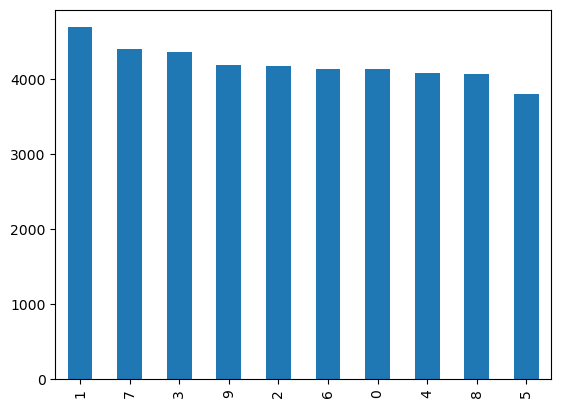

In [3]:
data["label"].value_counts().plot(kind="bar")

In [5]:
x = data.iloc[:,1:].values
y = data.iloc[:,:1]["label"]

In [6]:
x.shape ,y.shape

((42000, 784), (42000,))

In [7]:
x = x/255

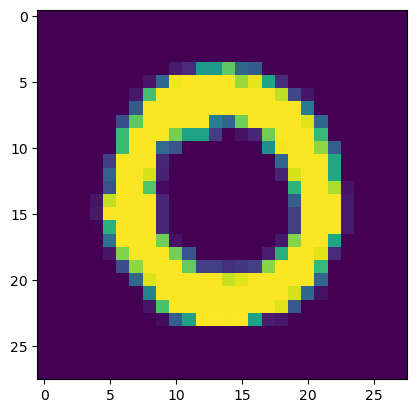

In [8]:
plt.imshow(x[1].reshape(28,28))

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [10]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train) , mnb.score(x_test,y_test) 

(0.8243197278911565, 0.8248412698412698)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(x_train,y_train)
rd.score(x_train,y_train) , rd.score(x_test,y_test)

(1.0, 0.9653174603174604)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, MaxPool2D, Conv2D,Dropout

In [13]:
model = Sequential(
        [
            Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = (28,28,1)),
            Conv2D(32, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
        
            Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            Conv2D(64, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
            Conv2D(128, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            
          Flatten(),        
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(10, activation = "softmax")
        ]
        )

In [14]:
model.compile(optimizer="adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [15]:
x_train.shape,y_train.shape

((29400, 784), (29400,))

In [16]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [17]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [18]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),)

Epoch 1/10
919/919 [==============================] - 132s 140ms/step - loss: 0.3838 - accuracy: 0.8790 - val_loss: 0.0805 - val_accuracy: 0.9760
Epoch 2/10
919/919 [==============================] - 135s 146ms/step - loss: 0.0980 - accuracy: 0.9719 - val_loss: 0.0536 - val_accuracy: 0.9861
Epoch 3/10
919/919 [==============================] - 165s 180ms/step - loss: 0.0739 - accuracy: 0.9792 - val_loss: 0.0479 - val_accuracy: 0.9865
Epoch 4/10
919/919 [==============================] - 127s 139ms/step - loss: 0.0633 - accuracy: 0.9823 - val_loss: 0.0548 - val_accuracy: 0.9850
Epoch 5/10
919/919 [==============================] - 128s 139ms/step - loss: 0.0539 - accuracy: 0.9843 - val_loss: 0.0500 - val_accuracy: 0.9860
Epoch 6/10
919/919 [==============================] - 126s 137ms/step - loss: 0.0513 - accuracy: 0.9860 - val_loss: 0.0456 - val_accuracy: 0.9876
Epoch 7/10
919/919 [==============================] - 126s 137ms/step - loss: 0.0447 - accuracy: 0.9874 - val_loss: 0.0469 -

In [19]:
model.evaluate(x_train,y_train) , model.evaluate(x_test,y_test)

394/394 [==============================] - 13s 33ms/step - loss: 0.0465 - accuracy: 0.9883


([0.010538081638514996, 0.996666669845581],
 [0.04649041220545769, 0.9883333444595337])

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

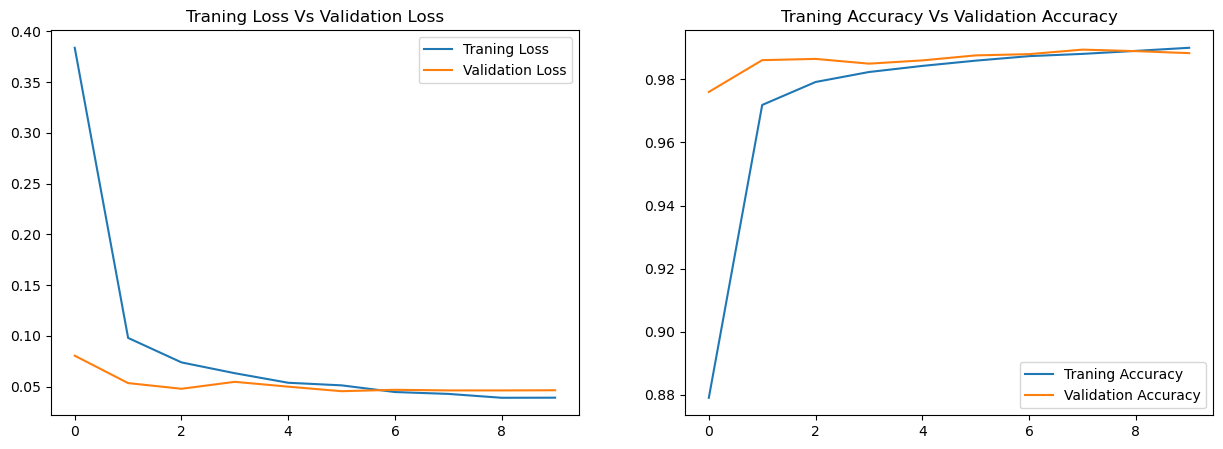

In [21]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss,label="Traning Loss")
plt.plot(val_loss,label="Validation Loss")
plt.title("Traning Loss Vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracy,label="Traning Accuracy")
plt.plot(val_accuracy,label="Validation Accuracy")
plt.title("Traning Accuracy Vs Validation Accuracy")
plt.legend()


*********End the code ************